In [1]:
%pylab inline
import sys
import pandas as pd
import numpy as np
import datetime
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
from yahoo_finance import Share
import pandas.io.data as web


Populating the interactive namespace from numpy and matplotlib


In [8]:
symbol="XLF"
symbol = 'XLF'
start, end = '2007-05-02', '2016-04-11'
data = web.DataReader(symbol, 'yahoo', start, end)
data=pd.DataFrame(data)
prices=data['Adj Close']
#prices=np.asarray(list(prices))
prices=prices.astype(float)

In [11]:
kf=KalmanFilter(transition_matrices=[[1,1],[0,1]],observation_matrices=[[1,0]],
                initial_state_mean=[prices[0],0],transition_covariance=[[.0035,0],[0,0.0035]],
                observation_covariance=10)
# kf=kf.em(prices,n_iter=5)
(a,b)=kf.filter(prices)

In [12]:
data = pd.DataFrame()
data['prices']= prices
data['kalman_price'] = a[:,0]
data['kalman_vel'] = a[:,1]
data['kalman_predict'] = a[:,0]+a[:,1]

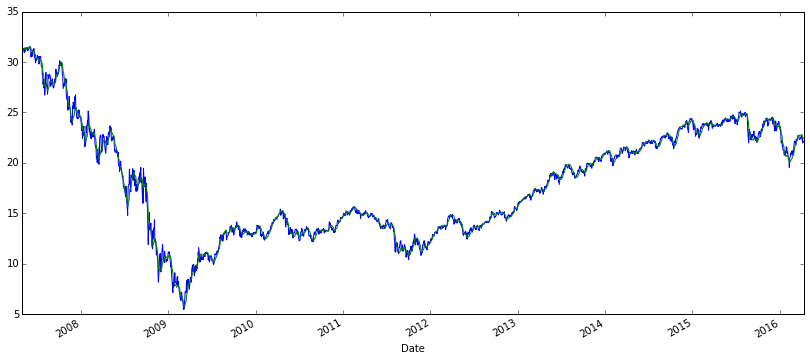

In [14]:
data.prices.plot(figsize=(14,6))
data.kalman_price.plot()

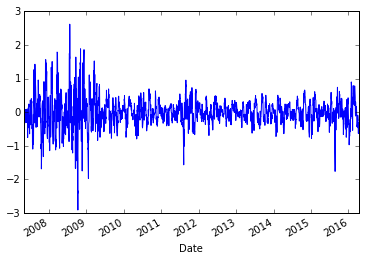

In [15]:
data['resids'] = data.prices - data.kalman_price
data.resids.plot()

In [48]:
def get_positions(df):
    diffdiff=df.resids
    max=0
    signal=0
    buysell= []
    #threshold=5
    for i in range(len(diffdiff)):
        if (abs(diffdiff[i])> max):
            max=abs(diffdiff[i])
            signal=0
        else:
            if (diffdiff[i]>0):
                signal = -1
            else:
                signal = 1
        if(diffdiff[i]*diffdiff[i-1]<= 0):
            signal=0
            max=abs(diffdiff[i])
        buysell.append(signal)
    return buysell

In [49]:
bs = get_positions(data)

In [50]:
data['position']= bs

In [52]:
data['daily_rets'] = (data['prices'].shift(-1) - data['prices']) / data['prices']

In [55]:
data['returns'] = data.position * data.daily_rets

In [56]:
data.head()

,prices,kalman_price,kalman_vel,kalman_predict,resids,position,daily_rets,returns
Date,,,,,,,,
2007-05-02,30.869211,30.869211,0.000000,30.869211,0.000000,0,0.009398,0.000000
2007-05-03,31.159334,30.915791,0.024354,30.940145,0.243543,0,0.003458,0.000000
2007-05-04,31.267095,31.036970,0.064833,31.101803,0.230125,-1,0.001326,-0.001326
2007-05-07,31.308541,31.180501,0.089716,31.270217,0.128040,-1,-0.002118,0.002118
2007-05-08,31.242225,31.258995,0.086901,31.345896,-0.016770,0,0.005306,0.000000


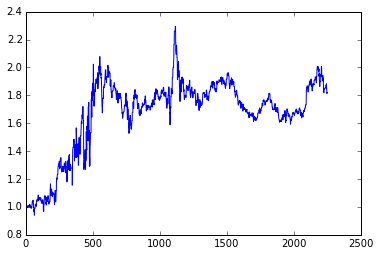

In [57]:
plot(np.cumprod(data.returns + 1))

In [54]:
data['prices'].shift(-1)

Date
2007-05-02    31.159334
2007-05-03    31.267095
2007-05-04    31.308541
2007-05-07    31.242225
2007-05-08    31.408011
2007-05-09    30.960390
2007-05-10    31.291962
2007-05-11    31.142755
2007-05-14    31.068152
2007-05-15    31.424590
2007-05-16    31.267095
2007-05-17    31.349987
2007-05-18    31.383144
2007-05-21    31.408011
2007-05-22    31.383144
2007-05-23    31.101309
2007-05-24    31.159334
2007-05-25    31.291962
2007-05-29    31.507481
2007-05-30    31.416302
2007-05-31    31.515772
2007-06-01    31.474327
2007-06-04    31.283674
2007-06-05    31.018415
2007-06-06    30.496194
2007-06-07    30.852632
2007-06-08    30.993548
2007-06-11    30.570797
2007-06-12    31.151046
2007-06-13    31.101309
                ...    
2016-02-29    21.681510
2016-03-01    21.920207
2016-03-02    22.069391
2016-03-03    22.158902
2016-03-04    22.148957
2016-03-07    21.790913
2016-03-08    21.820750
2016-03-09    21.800859
2016-03-10    22.367760
2016-03-11    22.298141
2016-03-14 

<function matplotlib.pyplot.show>

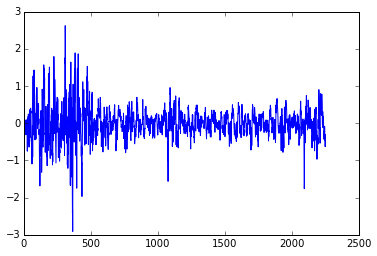

In [16]:
c=prices-a[:,0]
plt.plot(c)
plt.show

In [37]:
diffdiff=c
max=0
signal=0
buysell= []
threshold=5
for i in range(1,len(diffdiff)):
    if (abs(diffdiff[i])> max):
            max=abs(diffdiff[i])
            signal=0
    else:
        if (diffdiff[i]>0):
            signal = -1
        else:
            signal = 1
    if(diffdiff[i]*diffdiff[i-1]<= 0):
        signal=0
        max=abs(diffdiff[i])
    buysell.append(signal)

In [62]:
returns = (prices.shift(-1)-prices)/prices

In [58]:
returns.shape

(2252,)

In [39]:
len(buysell)

2251

In [68]:
tradereturns=returns[:-1]*buysell

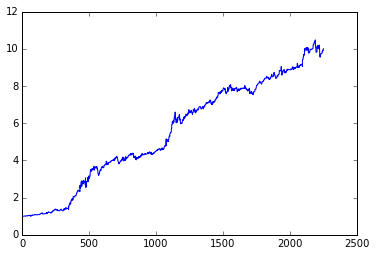

In [69]:
plt.plot(np.cumprod(1+tradereturns))
plt.show()

In [63]:
data.daily_rets - returns

Date
2007-05-02     0
2007-05-03     0
2007-05-04     0
2007-05-07     0
2007-05-08     0
2007-05-09     0
2007-05-10     0
2007-05-11     0
2007-05-14     0
2007-05-15     0
2007-05-16     0
2007-05-17     0
2007-05-18     0
2007-05-21     0
2007-05-22     0
2007-05-23     0
2007-05-24     0
2007-05-25     0
2007-05-29     0
2007-05-30     0
2007-05-31     0
2007-06-01     0
2007-06-04     0
2007-06-05     0
2007-06-06     0
2007-06-07     0
2007-06-08     0
2007-06-11     0
2007-06-12     0
2007-06-13     0
              ..
2016-02-29     0
2016-03-01     0
2016-03-02     0
2016-03-03     0
2016-03-04     0
2016-03-07     0
2016-03-08     0
2016-03-09     0
2016-03-10     0
2016-03-11     0
2016-03-14     0
2016-03-15     0
2016-03-16     0
2016-03-17     0
2016-03-18     0
2016-03-21     0
2016-03-22     0
2016-03-23     0
2016-03-24     0
2016-03-28     0
2016-03-29     0
2016-03-30     0
2016-03-31     0
2016-04-01     0
2016-04-04     0
2016-04-05     0
2016-04-06     0
2016-04-0

In [71]:
returns[:-1]

Date
2007-05-02    0.009398
2007-05-03    0.003458
2007-05-04    0.001326
2007-05-07   -0.002118
2007-05-08    0.005306
2007-05-09   -0.014252
2007-05-10    0.010710
2007-05-11   -0.004768
2007-05-14   -0.002396
2007-05-15    0.011473
2007-05-16   -0.005012
2007-05-17    0.002651
2007-05-18    0.001058
2007-05-21    0.000792
2007-05-22   -0.000792
2007-05-23   -0.008980
2007-05-24    0.001866
2007-05-25    0.004256
2007-05-29    0.006887
2007-05-30   -0.002894
2007-05-31    0.003166
2007-06-01   -0.001315
2007-06-04   -0.006057
2007-06-05   -0.008479
2007-06-06   -0.016836
2007-06-07    0.011688
2007-06-08    0.004567
2007-06-11   -0.013640
2007-06-12    0.018980
2007-06-13   -0.001597
                ...   
2016-02-26   -0.010788
2016-02-29    0.033665
2016-03-01    0.011009
2016-03-02    0.006806
2016-03-03    0.004056
2016-03-04   -0.000449
2016-03-07   -0.016165
2016-03-08    0.001369
2016-03-09   -0.000912
2016-03-10    0.026004
2016-03-11   -0.003112
2016-03-14   -0.000446
2016-0